In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')


In [3]:
sensor_data = pd.read_csv("data/data_namuk/sensor_data_all.csv")
sensor_data = sensor_data.rename(columns = {'Unnamed: 0': 'index'})
sensor_data = sensor_data.set_index('index')
sensor_data_target = sensor_data['label']
sensor_data_drop=sensor_data.drop('label', axis=1)
sensor_data_drop.describe()

,LAX,LAY,LAZ,LA_mad,LA_max,LA_mean,LA_median,LA_min,LA_quantile,LA_skew,...,RP_max,RP_mean,RP_median,RP_min,RP_quantile,RP_skew,RP_sma,RP_std,RP_sum,RP_var
count,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,...,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000,18415.000000
mean,123.402226,132.287157,121.244420,50.825667,191.277328,125.644601,125.857399,59.799077,125.857399,0.006028,...,31.623839,14.853093,14.115232,4.164540,14.115232,0.934523,14.843905,9.222567,103.971654,129.703192
std,73.789386,72.821813,76.999869,22.395027,48.706861,42.455327,56.653730,50.195426,56.653730,1.238426,...,20.916449,10.861800,11.240877,6.269297,11.240877,1.073045,10.817515,6.682056,76.032602,158.918675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.732051,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.645751,0.057143,0.000000,0.000000,0.000000
25%,60.000000,72.000000,52.000000,33.777778,160.000000,96.000000,84.000000,20.000000,84.000000,-1.263132,...,8.000000,3.571429,3.000000,1.000000,3.000000,0.000000,3.628571,2.380476,25.000000,5.666667
50%,120.000000,140.000000,120.000000,51.555556,204.000000,124.000000,124.000000,48.000000,124.000000,0.000000,...,38.000000,15.571429,14.000000,1.000000,14.000000,1.229634,15.542857,10.106575,109.000000,102.142857
75%,188.000000,196.000000,192.000000,68.444444,232.000000,156.000000,168.000000,88.000000,168.000000,1.235155,...,47.000000,23.857143,24.000000,5.000000,24.000000,1.727889,23.828571,13.098528,167.000000,171.571429
max,252.000000,252.000000,252.000000,111.111111,252.000000,250.666667,252.000000,248.000000,252.000000,1.732051,...,107.000000,35.714286,43.000000,28.000000,43.000000,2.645751,35.657143,40.074336,250.000000,1605.952381


In [4]:
sensor_data['label'].value_counts()

5     8587
20    3508
10    3218
15    3102
Name: label, dtype: int64

In [5]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18415 entries, 0 to 18414
Data columns (total 67 columns):
LAX            18415 non-null int64
LAY            18415 non-null int64
LAZ            18415 non-null int64
LA_mad         18415 non-null float64
LA_max         18415 non-null int64
LA_mean        18415 non-null float64
LA_median      18415 non-null float64
LA_min         18415 non-null int64
LA_quantile    18415 non-null float64
LA_skew        18415 non-null float64
LA_sma         18415 non-null float64
LA_std         18415 non-null float64
LA_sum         18415 non-null int64
LA_var         18415 non-null float64
LP1            18415 non-null int64
LP2            18415 non-null int64
LP3            18415 non-null int64
LP4            18415 non-null int64
LP5            18415 non-null int64
LP6            18415 non-null int64
LP7            18415 non-null int64
LP_kurt        18415 non-null float64
LP_mad         18415 non-null float64
LP_max         18415 non-null int64
LP_mean

In [5]:
sensor_data.columns

Index(['LAX', 'LAY', 'LAZ', 'LA_mad', 'LA_max', 'LA_mean', 'LA_median',
       'LA_min', 'LA_quantile', 'LA_skew', 'LA_sma', 'LA_std', 'LA_sum',
       'LA_var', 'LP1', 'LP2', 'LP3', 'LP4', 'LP5', 'LP6', 'LP7', 'LP_kurt',
       'LP_mad', 'LP_max', 'LP_mean', 'LP_median', 'LP_min', 'LP_quantile',
       'LP_skew', 'LP_sma', 'LP_std', 'LP_sum', 'LP_var', 'RAX', 'RAY', 'RAZ',
       'RA_mad', 'RA_max', 'RA_mean', 'RA_median', 'RA_min', 'RA_quantile',
       'RA_skew', 'RA_sma', 'RA_std', 'RA_sum', 'RA_var', 'RP1', 'RP2', 'RP3',
       'RP4', 'RP5', 'RP6', 'RP7', 'RP_kurt', 'RP_mad', 'RP_max', 'RP_mean',
       'RP_median', 'RP_min', 'RP_quantile', 'RP_skew', 'RP_sma', 'RP_std',
       'RP_sum', 'RP_var', 'label'],
      dtype='object')

In [13]:
sensor_data.columns.value_counts()

LP_sum         1
LP_min         1
LP_std         1
RA_var         1
LA_median      1
LAX            1
LAY            1
LP_skew        1
LP6            1
RP2            1
LP_var         1
label          1
LP3            1
LP7            1
RA_mad         1
RA_sma         1
RP_quantile    1
LP_mad         1
RA_mean        1
RP_mean        1
RP_mad         1
RP1            1
RA_min         1
LP_sma         1
LA_skew        1
RA_median      1
RP_sum         1
RP_std         1
RA_std         1
LP_kurt        1
              ..
LP5            1
LA_quantile    1
LP2            1
LP_quantile    1
LP4            1
LA_mad         1
LA_sum         1
RAX            1
LA_sma         1
RP_var         1
RP3            1
RP_min         1
RP_max         1
RP5            1
RP_kurt        1
RA_skew        1
LAZ            1
RA_max         1
RAY            1
LA_var         1
RP6            1
RP7            1
LA_std         1
RP_median      1
RAZ            1
LA_max         1
LA_min         1
RA_quantile   

In [11]:
print('LP1의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP1']==1]['LP1'].count()+sensor_data[sensor_data['LP1']==0]['LP1'].count())
print(sensor_data[sensor_data['LP1']==0]['LP1'].count())
print('LP1의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP1']==1]['LP1'].count()+sensor_data[sensor_data['LP1']==0]['LP1'].count())
print('LP2의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP2']==1]['LP2'].count()+sensor_data[sensor_data['LP2']==0]['LP2'].count())
print('LP3의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP3']==1]['LP3'].count()+sensor_data[sensor_data['LP3']==0]['LP3'].count())
print('LP4의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP4']==1]['LP4'].count()+sensor_data[sensor_data['LP4']==0]['LP4'].count())
print('LP5의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP5']==1]['LP5'].count()+sensor_data[sensor_data['LP5']==0]['LP5'].count())
print('LP6의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP7']==1]['LP6'].count()+sensor_data[sensor_data['LP6']==0]['LP6'].count())
print('LP7의 데이터 1과 0의 개수:',sensor_data[sensor_data['LP7']==1]['LP7'].count()+sensor_data[sensor_data['LP7']==0]['LP7'].count())
"""
co=sensor_data[sensor_data['LP1']>0]['LP1']
co.count()
ll=sensor_data['LP1'].count() - co.count()
lㅣ"""

LP1의 데이터 1과 0의 개수: 6688
507
LP1의 데이터 1과 0의 개수: 6688
LP2의 데이터 1과 0의 개수: 5581
LP3의 데이터 1과 0의 개수: 8414
LP4의 데이터 1과 0의 개수: 4638
LP5의 데이터 1과 0의 개수: 4595
LP6의 데이터 1과 0의 개수: 3627
LP7의 데이터 1과 0의 개수: 3877


"\nco=sensor_data[sensor_data['LP1']>0]['LP1']\nco.count()\nll=sensor_data['LP1'].count() - co.count()\nlㅣ"

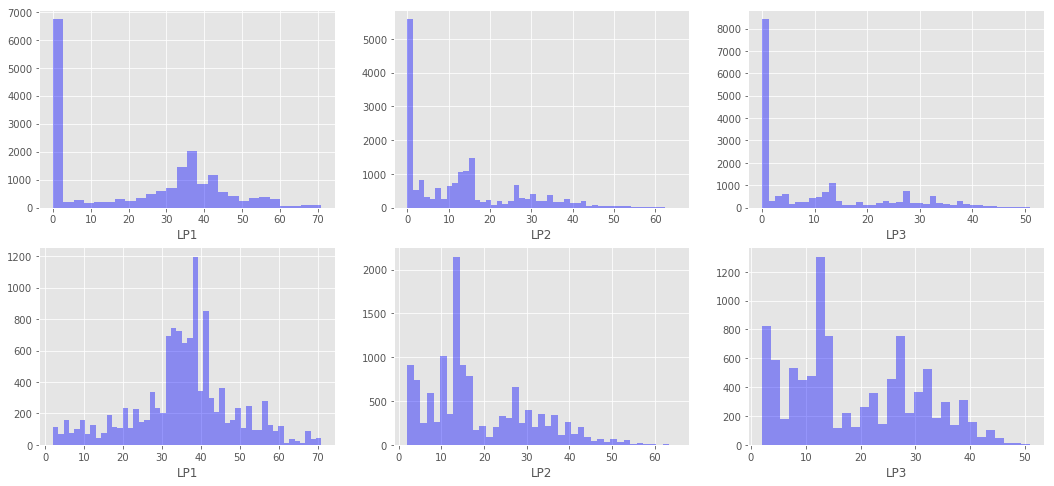

In [4]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP1'],color="b",ax=ax1,kde=False)
sns.distplot(sensor_data[sensor_data['LP1']>1]['LP1'],color="b",ax=ax4,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP2'],color="b",ax=ax2, kde=False)
sns.distplot(sensor_data[sensor_data['LP2']>1]['LP2'],color="b",ax=ax5,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP3'],color="b",ax=ax3,kde=False)
sns.distplot(sensor_data[sensor_data['LP3']>1]['LP3'],color="b",ax=ax6,kde=False)

#저장하기 ax.figure.savefig('lm.png')

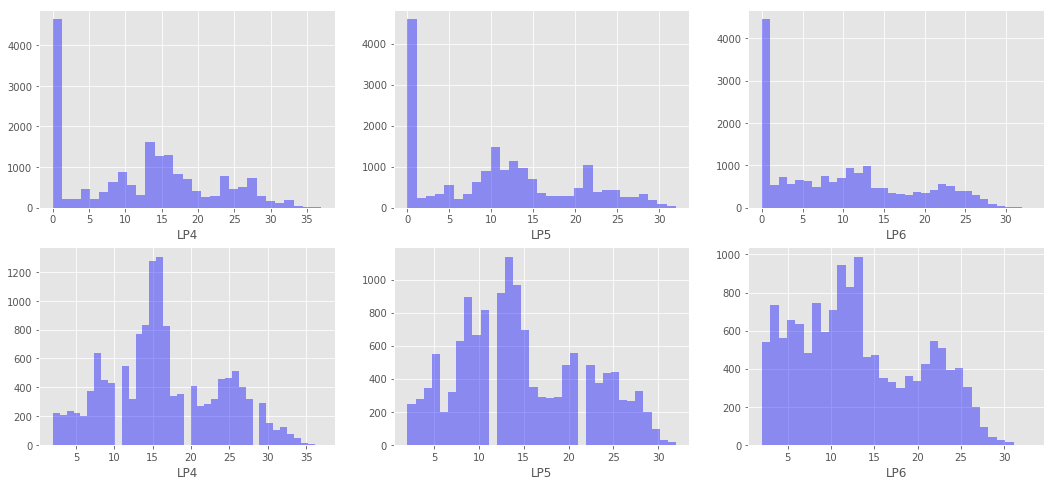

In [5]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP4'],color="b",ax=ax1,kde=False)
sns.distplot(sensor_data[sensor_data['LP4']>1]['LP4'],color="b",ax=ax4,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP5'],color="b",ax=ax2, kde=False)
sns.distplot(sensor_data[sensor_data['LP5']>1]['LP5'],color="b",ax=ax5,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP6'],color="b",ax=ax3,kde=False)
sns.distplot(sensor_data[sensor_data['LP6']>1]['LP6'],color="b",ax=ax6,kde=False)

#저장하기 ax.figure.savefig('lm.png')

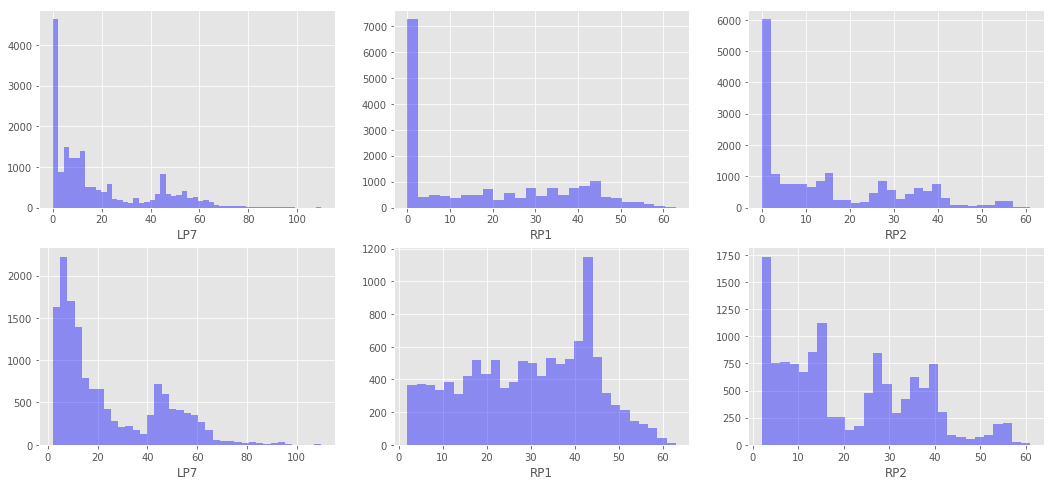

In [6]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

#값확인 후 이상값 수정
sns.distplot(sensor_data['LP7'],color="b",ax=ax1,kde=False)
sns.distplot(sensor_data[sensor_data['LP7']>1]['LP7'],color="b",ax=ax4,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP1'],color="b",ax=ax2, kde=False)
sns.distplot(sensor_data[sensor_data['RP1']>1]['RP1'],color="b",ax=ax5,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP2'],color="b",ax=ax3,kde=False)
sns.distplot(sensor_data[sensor_data['RP2']>1]['RP2'],color="b",ax=ax6,kde=False)

#저장하기 ax.figure.savefig('lm.png')

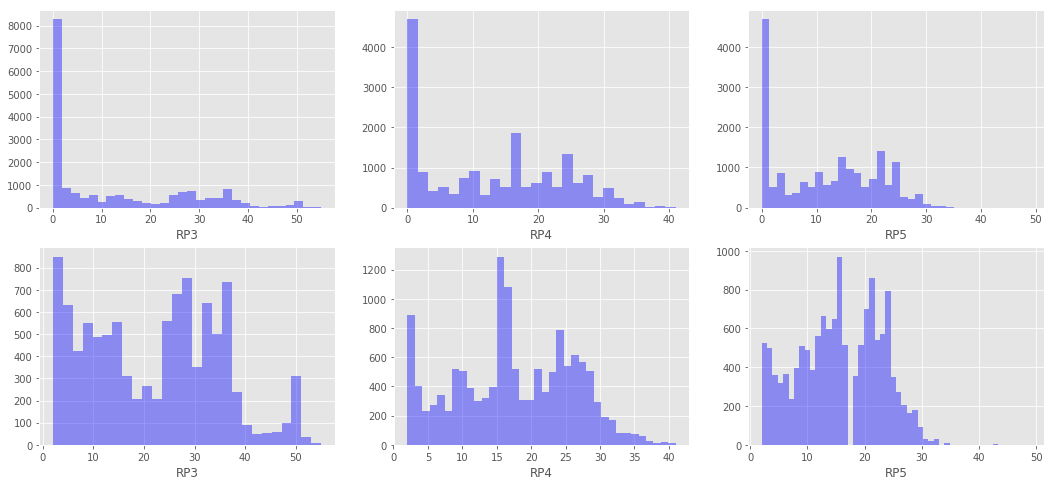

In [7]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP3'],color="b",ax=ax1,kde=False)
sns.distplot(sensor_data[sensor_data['RP3']>1]['RP3'],color="b",ax=ax4,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP4'],color="b",ax=ax2, kde=False)
sns.distplot(sensor_data[sensor_data['RP4']>1]['RP4'],color="b",ax=ax5,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP5'],color="b",ax=ax3,kde=False)
sns.distplot(sensor_data[sensor_data['RP5']>1]['RP5'],color="b",ax=ax6,kde=False)

#저장하기 ax.figure.savefig('lm.png')

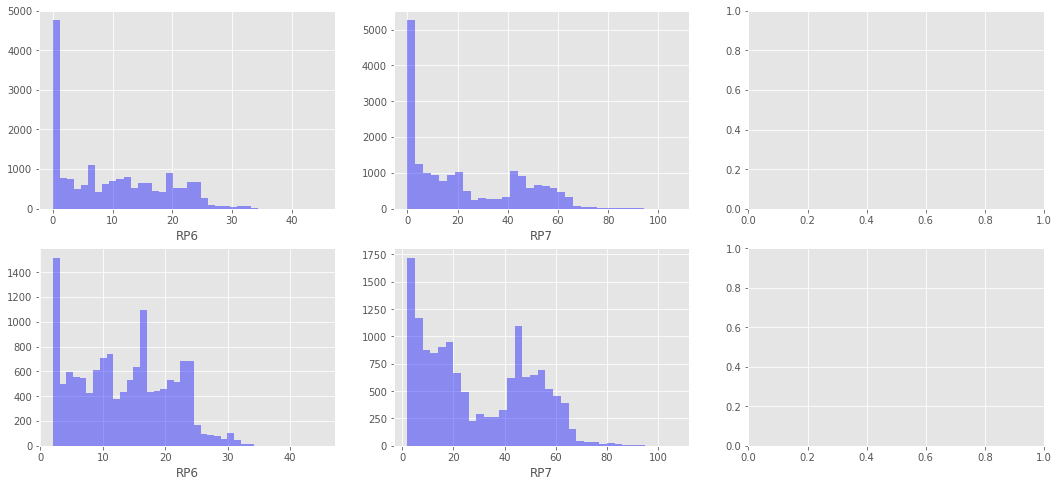

In [8]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP6'],color="b",ax=ax1,kde=False)
sns.distplot(sensor_data[sensor_data['RP6']>1]['RP6'],color="b",ax=ax4,kde=False)

#값확인 후 이상값 수정
sns.distplot(sensor_data['RP7'],color="b",ax=ax2, kde=False)
sns.distplot(sensor_data[sensor_data['RP7']>1]['RP7'],color="b",ax=ax5,kde=False)

#값확인 후 이상값 수정
#sns.distplot(sensor_data['RP5'],color="b",ax=ax3,kde=False)
#sns.distplot(sensor_data[sensor_data['RP5']>1]['RP5'],color="b",ax=ax6,kde=False)

#저장하기 ax.figure.savefig('lm.png')

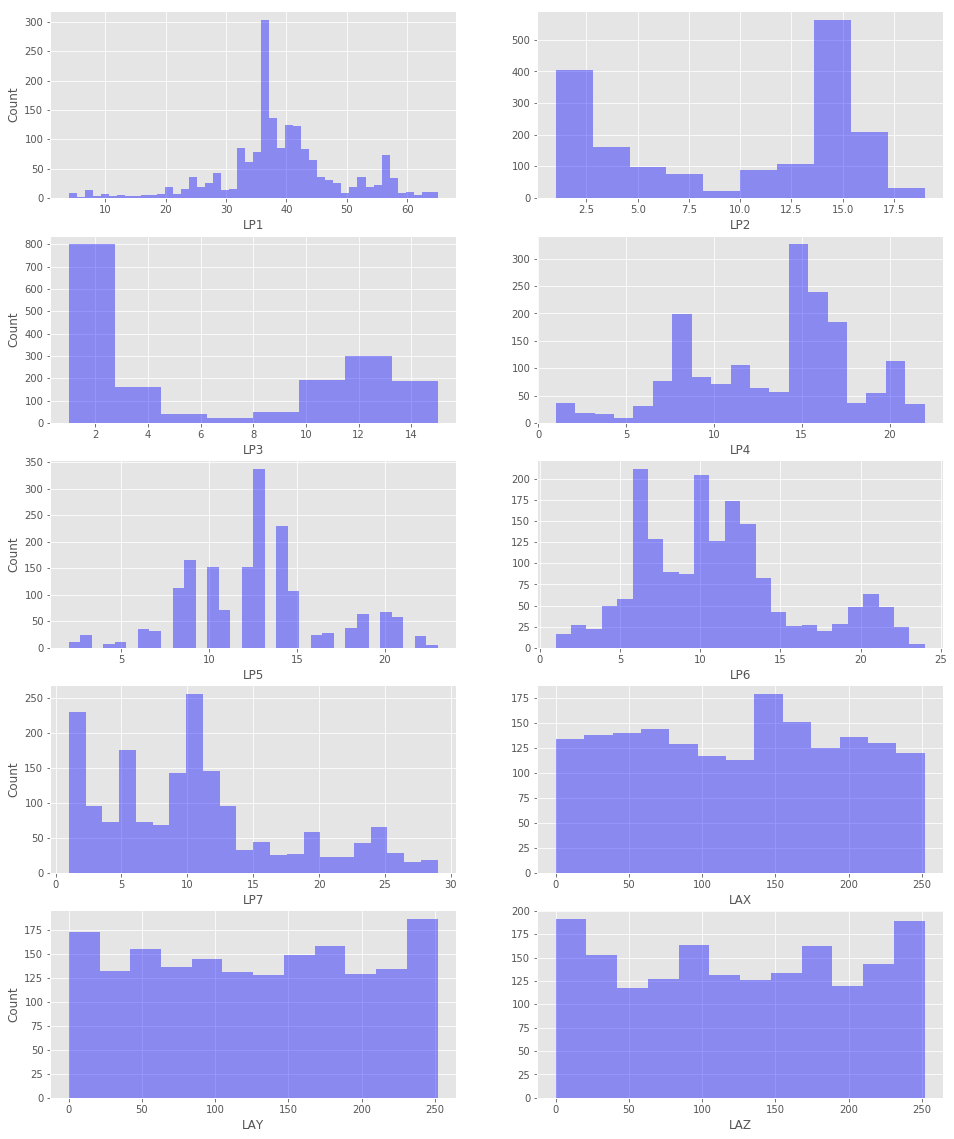

In [9]:
rawData_LP_origin = pd.read_csv('data/5kg_gun_142832_left_pressure_data.txt', sep = ' ', names=['time','LP1','LP2','LP3', 'LP4', 'LP5', 'LP6','LP7'])
#rawData1 = rawData.set_index('time')
rawData_LP_origin.drop('time', axis=1, inplace=True)
rawData_LA_origin = pd.read_csv('data/5kg_gun_142832_left_axis_data.txt', sep = ' ', names=['time','LAX','LAY','LAZ'])
rawData_LA_origin.drop('time', axis=1, inplace=True)


#figure,((ax1,ax2,ax3,ax4),(ax4,ax5,ax6))=plt.subplots(nrows=3,ncols=3)
fig, axes = plt.subplots(nrows=5,ncols=2)
#figure.set_size_inches(18,8)
fig.set_size_inches(16, 20)

#값확인 후 이상값 수정
sns.distplot(rawData_LP_origin['LP1'],color="b",ax=axes[0][0],kde=False);axes[0][0].set(ylabel='Count')
sns.distplot(rawData_LP_origin['LP2'],color="b",ax=axes[0][1],kde=False)
sns.distplot(rawData_LP_origin['LP3'],color="b",ax=axes[1][0],kde=False);axes[1][0].set(ylabel='Count')
sns.distplot(rawData_LP_origin['LP4'],color="b",ax=axes[1][1],kde=False)
sns.distplot(rawData_LP_origin['LP5'],color="b",ax=axes[2][0],kde=False);axes[2][0].set(ylabel='Count')
sns.distplot(rawData_LP_origin['LP6'],color="b",ax=axes[2][1],kde=False)
sns.distplot(rawData_LP_origin['LP7'],color="b",ax=axes[3][0],kde=False);axes[3][0].set(ylabel='Count')
sns.distplot(rawData_LA_origin['LAX'],color="b",ax=axes[3][1],kde=False)
sns.distplot(rawData_LA_origin['LAY'],color="b",ax=axes[4][0],kde=False);axes[4][0].set(ylabel='Count')
sns.distplot(rawData_LA_origin['LAZ'],color="b",ax=axes[4][1],kde=False)
#sns.distplot(rawData_LP_origin[rawData_LP_origin['LP1']>1]['LP1'],color="b",ax=ax4,kde=False)
#axes[0][1].set(xlabel='Season', ylabel='Count',title="계절별 대여량")
#axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="시간별 대여량")
#axes[1][1].set(xlabel='Working Day', ylabel='Count',title="근무일 여부에 따른 대여량")"""

In [10]:
plt.figure(figsize=(8,6))
#figure.set_size_inches(18,8)
sns.boxplot(data=rawData_LP_origin,ax=axes[0][0])
#sns.boxplot(data=rawData_LA_origin,ax=axes[0][1])

<Figure size 576x432 with 0 Axes>